### 생육 데이터 전처리 + 시각화

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv("2020/생육데이터_최종.csv", encoding="ANSI")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3301 entries, 0 to 3300
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   도       3301 non-null   object 
 1   시군      3301 non-null   object 
 2   품목      3301 non-null   object 
 3   작기      3301 non-null   int64  
 4   농가명     3301 non-null   int64  
 5   week    3301 non-null   float64
 6   조사일자    3277 non-null   object 
 7   개체번호    3301 non-null   float64
 8   액아 개수   3301 non-null   float64
 9   액아구분    3273 non-null   object 
 10  초장      3301 non-null   float64
 11  엽수      3301 non-null   float64
 12  엽장      3301 non-null   float64
 13  엽폭      3301 non-null   float64
 14  엽병장     3301 non-null   float64
 15  관부직경    3301 non-null   float64
 16  화방번호    3273 non-null   float64
 17  화방별착과수  2042 non-null   float64
dtypes: float64(11), int64(2), object(5)
memory usage: 464.3+ KB


,도,시군,품목,작기,농가명,week,조사일자,개체번호,액아 개수,액아구분,초장,엽수,엽장,엽폭,엽병장,관부직경,화방번호,화방별착과수
0,충남,부여,딸기,1,11,0.0,2020-09-16,1.0,0.0,본주,32.4,7.0,8.5,6.0,16.6,12.16,0.0,NaN
1,충남,부여,딸기,1,11,0.0,2020-09-16,2.0,0.0,본주,26.5,7.0,5.1,3.9,3.5,11.19,0.0,NaN
2,충남,부여,딸기,1,11,0.0,2020-09-16,3.0,0.0,본주,27.5,7.0,8.3,6.9,12.4,12.60,0.0,NaN
3,충남,부여,딸기,1,11,0.0,2020-09-16,4.0,0.0,본주,31.5,6.0,9.1,5.6,19.8,11.89,0.0,NaN
4,충남,부여,딸기,1,11,1.0,2020-09-23,1.0,0.0,본주,35.8,8.0,6.6,4.5,7.1,12.58,0.0,NaN


In [21]:
df["화방별착과수"] = df["화방별착과수"].fillna(0)
df.head()

,도,시군,품목,작기,농가명,week,조사일자,개체번호,액아 개수,액아구분,초장,엽수,엽장,엽폭,엽병장,관부직경,화방번호,화방별착과수
0,충남,부여,딸기,1,11,0.0,2020-09-16,1.0,0.0,본주,32.4,7.0,8.5,6.0,16.6,12.16,0.0,0.0
1,충남,부여,딸기,1,11,0.0,2020-09-16,2.0,0.0,본주,26.5,7.0,5.1,3.9,3.5,11.19,0.0,0.0
2,충남,부여,딸기,1,11,0.0,2020-09-16,3.0,0.0,본주,27.5,7.0,8.3,6.9,12.4,12.60,0.0,0.0
3,충남,부여,딸기,1,11,0.0,2020-09-16,4.0,0.0,본주,31.5,6.0,9.1,5.6,19.8,11.89,0.0,0.0
4,충남,부여,딸기,1,11,1.0,2020-09-23,1.0,0.0,본주,35.8,8.0,6.6,4.5,7.1,12.58,0.0,0.0


In [22]:
sub_df = df[df["농가명"]!=52]

In [23]:
res_df = sub_df.groupby(["농가명", "week", "개체번호", "초장", "엽수", "엽장", "엽폭", "엽병장", "관부직경"])["화방별착과수"].sum().reset_index()
# res_df = sub_df.groupby(["농가명", "week"])["화방별착과수"].sum().reset_index()

In [24]:
res_df

,농가명,week,개체번호,초장,엽수,엽장,엽폭,엽병장,관부직경,화방별착과수
0,11,0.0,1.0,32.4,7.0,8.5,6.0,16.6,12.16,0.0
1,11,0.0,2.0,26.5,7.0,5.1,3.9,3.5,11.19,0.0
2,11,0.0,3.0,27.5,7.0,8.3,6.9,12.4,12.60,0.0
3,11,0.0,4.0,31.5,6.0,9.1,5.6,19.8,11.89,0.0
4,11,1.0,1.0,35.8,8.0,6.6,4.5,7.1,12.58,0.0
...,...,...,...,...,...,...,...,...,...,...
1389,49,35.0,2.0,19.2,11.0,3.8,2.9,5.4,35.35,8.0
1390,49,35.0,3.0,20.3,11.0,4.1,3.8,3.0,35.14,4.0
1391,49,36.0,1.0,21.2,10.0,3.3,2.3,7.3,35.33,0.0
1392,49,36.0,2.0,17.5,10.0,3.8,2.9,5.4,35.35,7.0


In [25]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   농가명     1394 non-null   int64  
 1   week    1394 non-null   float64
 2   개체번호    1394 non-null   float64
 3   초장      1394 non-null   float64
 4   엽수      1394 non-null   float64
 5   엽장      1394 non-null   float64
 6   엽폭      1394 non-null   float64
 7   엽병장     1394 non-null   float64
 8   관부직경    1394 non-null   float64
 9   화방별착과수  1394 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 109.0 KB


In [28]:
for i in res_df["농가명"].unique() :
    sub_df = res_df[res_df["농가명"]==i]
    print(i, sub_df.shape, sub_df.shape[0]/4)

11 (128, 10) 32.0
16 (178, 10) 44.5
20 (116, 10) 29.0
23 (116, 10) 29.0
24 (113, 10) 28.25
25 (108, 10) 27.0
26 (112, 10) 28.0
31 (134, 10) 33.5
34 (132, 10) 33.0
38 (128, 10) 32.0
49 (129, 10) 32.25


In [30]:
res_df.to_csv("./2020/생육데이터_최종_합.csv", encoding="ANSI", index=False)

In [28]:
# 개체 별...
# x = wekk
# y = 초장, 엽수, 엽장, 엽폭, 엽병장, 관부직경, .. 그리고 화방별착과수

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

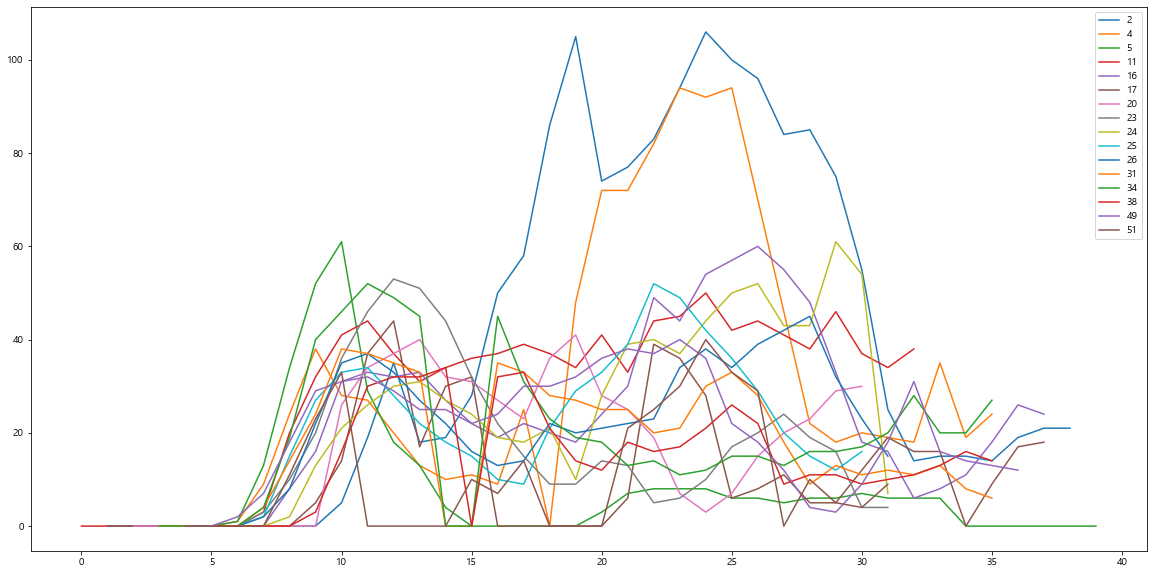

In [30]:
x = list(range(0,40))
plt.figure(figsize=(20, 10))

for f in list(res_df["농가명"].unique()) :
    plt.plot(res_df[res_df["농가명"]==f]["week"], res_df[res_df["농가명"]==f]["화방별착과수"], label=f)

plt.legend()
# plt.title(f"20번 농가 개체 별 {c}")
plt.show()

In [34]:
res_df.columns[6:]

Index(['초장', '엽수', '엽장', '엽폭', '엽병장', '관부직경', '화방별착과수'], dtype='object')

In [39]:
res_df.to_csv("2020/2.생육/2020_딸기 생육_20번 농가_합.csv", encoding="ANSI")

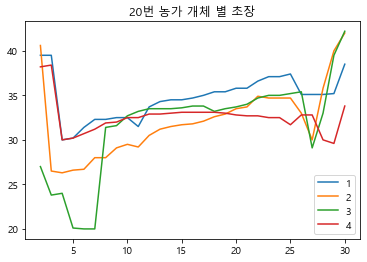

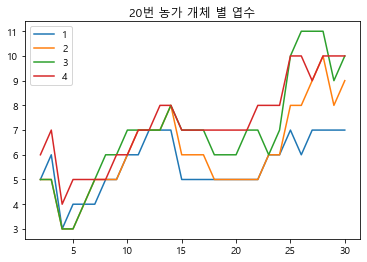

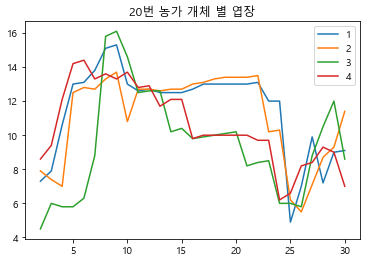

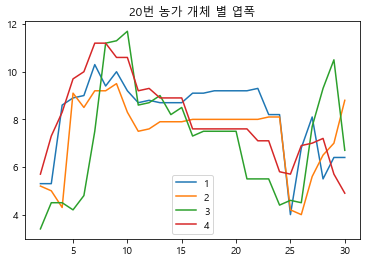

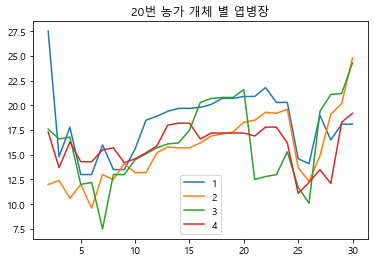

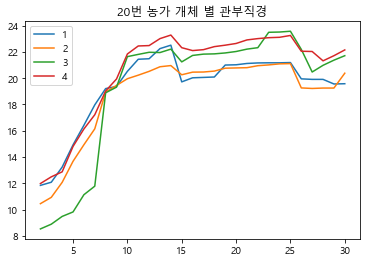

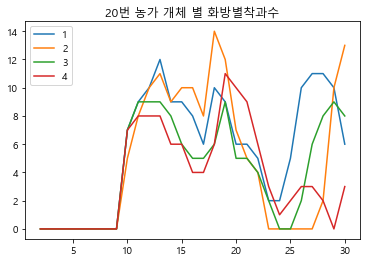

In [38]:
for c in res_df.columns[6:] :
    plt.plot(res_df[res_df["개체번호"]==1]["week"], res_df[res_df["개체번호"]==1][c], label="1")
    plt.plot(res_df[res_df["개체번호"]==2]["week"], res_df[res_df["개체번호"]==2][c], label="2")
    plt.plot(res_df[res_df["개체번호"]==3]["week"], res_df[res_df["개체번호"]==3][c], label="3")
    plt.plot(res_df[res_df["개체번호"]==4]["week"], res_df[res_df["개체번호"]==4][c], label="4")
    plt.legend()
    plt.title(f"20번 농가 개체 별 {c}")
    plt.show()